In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [4]:
song_features = pd.read_csv('spotify_features.csv').drop(['Unnamed: 0'],axis=1)

In [5]:
song_features

,song_title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url
0,On A Good Day,OceanLab,NaN,0.619,0.730,6.0,-8.098,1.0,0.0259,0.022000,0.04590,0.3140,0.5370,135.979,357160.0,NaN
1,Eternal Way,Fraxo,NaN,0.517,0.621,10.0,-2.894,0.0,0.0419,0.608000,0.00216,0.1500,0.2720,139.828,318929.0,NaN
2,All I See (feat. Laura Brehm),Draper,NaN,0.669,0.758,1.0,-6.033,1.0,0.0424,0.075100,0.00650,0.1170,0.4000,100.030,204426.0,NaN
3,Dream State,Kozah,NaN,0.383,0.762,11.0,-7.124,0.0,0.0361,0.000227,0.37100,0.8800,0.0889,75.019,270387.0,NaN
4,Unity,TheFatRat,NaN,0.707,0.880,4.0,-3.211,0.0,0.0317,0.004240,0.03790,0.0534,0.5650,105.003,249286.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,Rasputin,Majestic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2216,Infinity,Jaymes Young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2217,Good Days,SZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2218,Where Are You Now,Lost Frequencies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
song_features.isna().sum()

song_title             0
artists                0
danceability        1088
energy              1088
key                 1088
loudness            1088
mode                1088
speechiness         1088
acousticness        1088
instrumentalness    1088
liveness            1088
valence             1088
tempo               1088
duration_ms         1088
song_and_artist        0
dtype: int64

In [10]:
song_features.drop(['uri','url'],inplace=True,axis=1)

In [16]:
df_cleaned_subset = song_features.dropna(subset=['danceability', 'energy','key','loudness','mode','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms'])

In [6]:
song_features['song_and_artist'] = song_features['song_title'] + ' - ' + song_features['artists']

In [7]:
song_features['song_title'] = song_features['song_title'].str.lower()

In [20]:
song_features = df_cleaned_subset

In [21]:
song_features.to_csv('song_features.csv')

In [23]:
cluster_features = song_features.drop(['song_title','artists','song_and_artist'],axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(cluster_features)
standard_cluster = scaler.transform(cluster_features)

standard_cluster = pd.DataFrame(standard_cluster,columns=cluster_features.columns)

In [26]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [27]:
standard_cluster.to_csv('std_features.csv')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

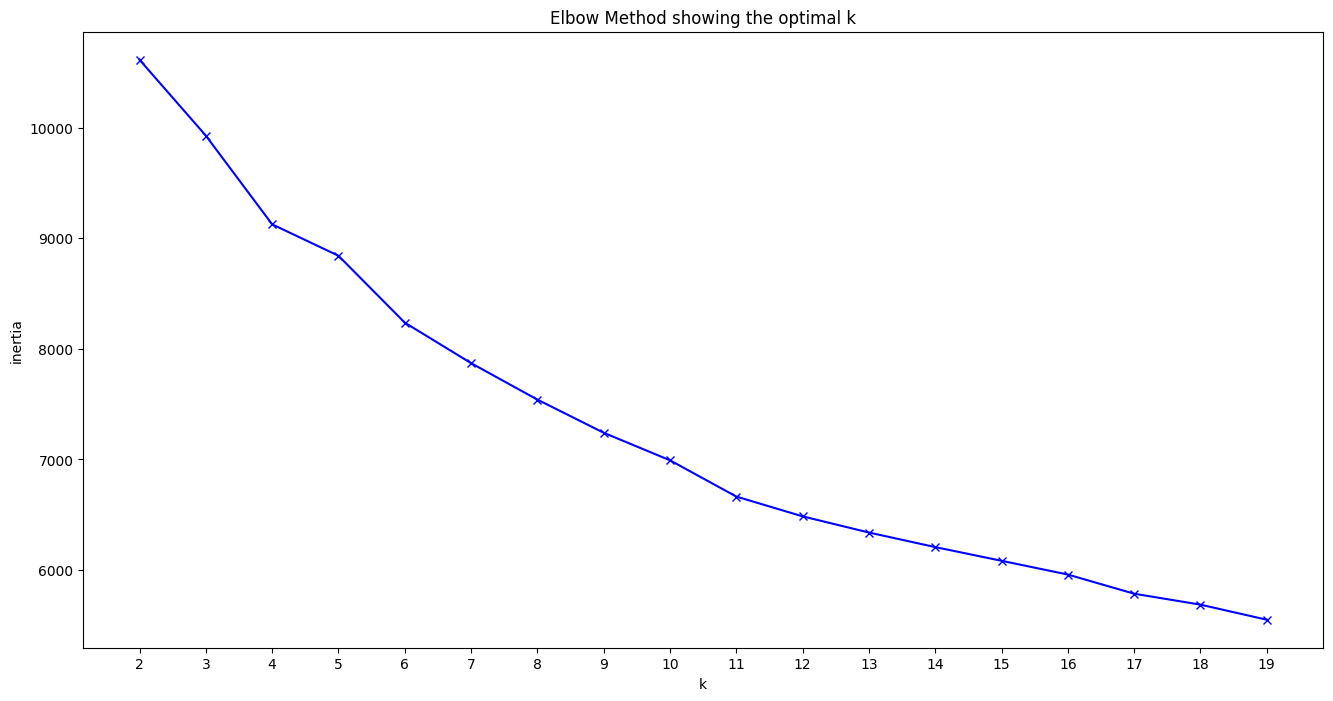

In [28]:
import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(standard_cluster)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234).fit(standard_cluster)
clusters = kmeans.predict(standard_cluster)
pd.Series(clusters).value_counts().sort_index()

0    230
1    421
2     85
3    396
Name: count, dtype: int64

In [32]:
pickle.dump(kmeans, open('kmean.pkl', 'wb'))

In [33]:
cluster_df = pd.concat([song_features,pd.Series(clusters)],axis=1)

In [34]:
cluster_df = cluster_df.rename(columns={0:'cluster'})

In [36]:
cluster_df.to_csv('df_withclusters.csv')

In [37]:
kmeans.inertia_

9125.404617089984

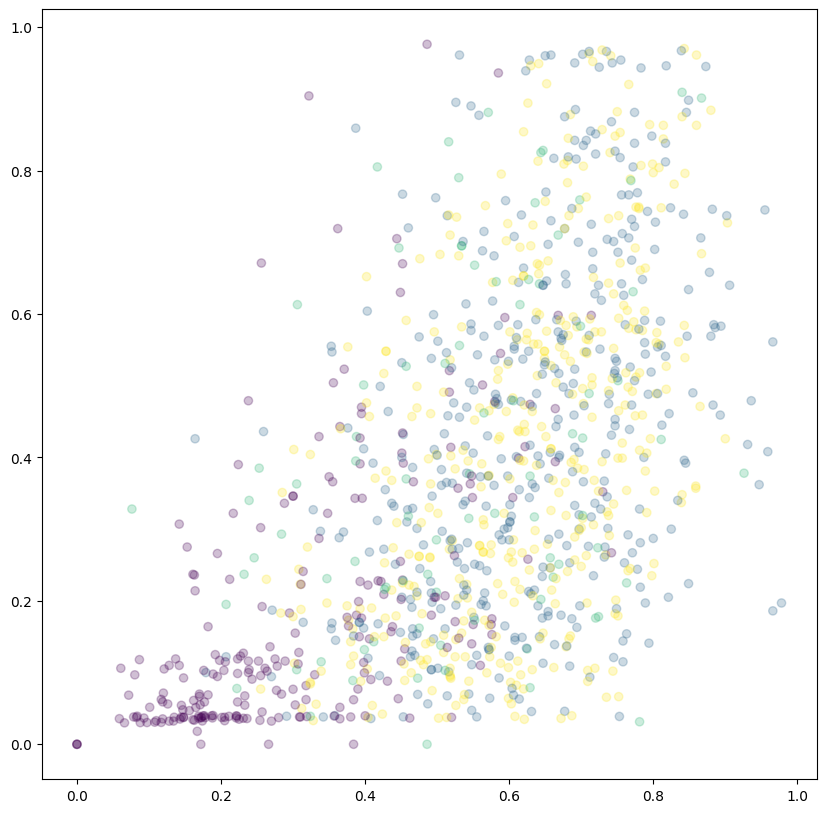

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(cluster_features['danceability'], cluster_features['valence'], c=clusters,alpha=0.25)
plt.show()

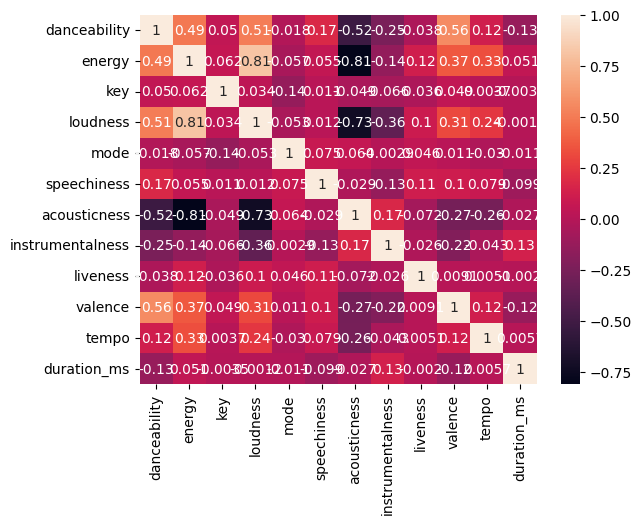

In [39]:
import seaborn as sns

correlation_matrix = cluster_features.corr()

sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [42]:
top100 = pd.read_csv('top100.csv')

In [45]:
import random 
new_song = input("Enter song: ")
new_artist = input("Enter artist: ")

if new_song in list(top100['Title']):
    print(random.choice(list(top100['Title'])))
else:
    print('No Recommendation')

Enter song:  OceanLab
Enter artist:  OceanLab


No Recommendation
